# Additional Analysis

## Prepare notebook

Import libraries 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import weightedcalcs as wc
from sklearn.cluster import KMeans
from sklearn import metrics
from matplotlib import rcParams

Import my source functions

In [2]:
import sys
import os
sys.path.append('../../src/features/')
from build_features import filter_col_with_regex
sys.path.append('../../src/visualization/')
from visualize import plot_bar

Set font for plotting

In [3]:
rcParams['font.family'] = 'serif'
rcParams['font.sans-serif'] = ['Baskerville']

Unpickle df, predictors, and target variables 

In [4]:
with open('../../data/processed/df.pickle', 'rb') as file:
    df = pickle.load(file)
with open('../../data/processed/predictors.pickle', 'rb') as file:
    X = pickle.load(file)
with open('../../data/processed/target.pickle', 'rb') as file:
    y = pickle.load(file)

Set up function for weighting observations

In [5]:
weight = df['weight']
calc = wc.Calculator('weight')

## Party identification 

Create string list of responses to pid3_2016

In [6]:
party_list = ['Democrat', 'Republican', 'Independent', 'Other', 'Not sure']

Calculate weighted distributions to responses to pid3_2016 and print

In [7]:
party_freq = calc.distribution(df, 'pid3_2016').round(3)
for ind, val in enumerate(party_freq):
    print(party_list[ind], val)

Democrat 0.36
Republican 0.294
Independent 0.296
Other 0.018
Not sure 0.031


Plot weighted frequency of party identification

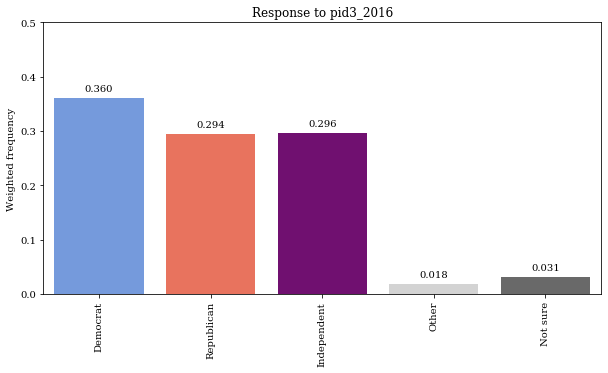

In [8]:
x = party_list
y = party_freq
palette = ['cornflowerblue', 'tomato', 'purple', 'lightgrey', 'dimgrey']
title = 'Response to pid3_2016'
party_plt = plot_bar(x, y, palette, title, x)

# add labels to bars
for bar in party_plt.patches:
    party_plt.annotate(format(bar.get_height(), '.3f'), (bar.get_x() + bar.get_width() / 2.,
                                                         bar.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

Determine features correlated with pid3_2016 

In [9]:
df.corr()['pid3_2016'].sort_values(ascending=False)[1:6]

post_pid3_2012       0.702563
pid3_baseline        0.578848
pid7_2016            0.504512
post_pid7_2012       0.455840
pp_demprim16_2016    0.455295
Name: pid3_2016, dtype: float64

## How important is this issue (not broken into vote choice)?

In [10]:
x_ticks = ['Very','Somewhat','Not Very','Unimportant','No Response']

Plot issue by importance

In [11]:
pattern = '(imiss_).{1}(_2016)'
col_list = filter_col_with_regex(df, pattern)
print(col_list)

['imiss_a_2016', 'imiss_b_2016', 'imiss_c_2016', 'imiss_d_2016', 'imiss_e_2016', 'imiss_f_2016', 'imiss_g_2016', 'imiss_h_2016', 'imiss_i_2016', 'imiss_j_2016', 'imiss_k_2016', 'imiss_l_2016', 'imiss_m_2016', 'imiss_n_2016', 'imiss_o_2016', 'imiss_p_2016', 'imiss_q_2016', 'imiss_r_2016', 'imiss_s_2016', 'imiss_t_2016', 'imiss_u_2016', 'imiss_x_2016', 'imiss_y_2016']


Visualize issue importance for entire population 

In [12]:
for idx, col in enumerate(col_list):
    freq = calc.distribution(df, col).round(3)
    iss_plt = plot_bar(x_ticks, freq, 'GnBu_d', issues[idx], x_ticks)
    for iss in iss_plt.patches:
        iss_plt.annotate(format(iss.get_height(), '.3f'), (iss.get_x() + iss.get_width() / 2.,
                                                         iss.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

NameError: name 'issues' is not defined

Calculate distribution of responses to issue of Jobs and Gay Rights

In [ ]:
jobs_freq = calc.distribution(df, 'imiss_o_2016').round(3)
gay_freq = calc.distribution(df, 'imiss_g_2016').round(3)
cntrst_list = [jobs_freq, gay_freq]

Plot distributions from jobs and gay rights and save

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 10))
for idx, iss in enumerate(cntrst_list):
    sns.barplot(x=iss, y=x_ticks, palette=sns.cubehelix_palette(5, start=.5, rot=-.2, reverse=True)
    ,ax=axes[idx])
    sns.set_style('white', {'ytick.direction': 'out'})
spines = ['right', 'top', 'bottom']
titles = ['Jobs', 'Gay Rights']
for ax in axes: 
    ax.set_xlim(0,1)
    for sp in spines:
        ax.spines[sp].set_visible(False)
    ax.set_xticks([])
    ax.set_xlabel('')
    ax.tick_params(axis = 'y', labelsize=18)
    ax.set_title(titles[idx])

axes[1].get_yaxis().set_visible(False)

plt.savefig('../../reports/figures/jobs_vs_gay.png')a

## K Means Clustering

Cluster predictors

In [ ]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
labels = kmeans.labels_
plt.figure(figsize=(5, 5))
plt.scatter(kmeans.cluster_centers_[
            :, 0], kmeans.cluster_centers_[:, 1], c='green', s=300)

y_pred = kmeans.predict(X)

In [ ]:
print(round(metrics.silhouette_score(X, labels, metric='euclidean'), 3))
round(metrics.calinski_harabasz_score(X, labels), 3)